In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime as dt
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [58]:
start = '2012-01-01'
end = dt.now().date()
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [59]:
data.reset_index(inplace=True)

In [60]:
data.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
3230,2024-11-04 00:00:00+00:00,170.679993,170.679993,171.919998,169.485001,171.240005,16194000
3231,2024-11-05 00:00:00+00:00,171.410004,171.410004,172.097000,170.369995,170.830002,12518300
3232,2024-11-06 00:00:00+00:00,178.330002,178.330002,178.639999,175.039993,175.350006,27061500
3233,2024-11-07 00:00:00+00:00,182.279999,182.279999,182.580002,178.889999,179.110001,16730400
3234,2024-11-08 00:00:00+00:00,179.860001,179.860001,182.350006,179.570007,182.000000,15004600


In [61]:
data.columns = data.columns.droplevel(1)  
data


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
3230,2024-11-04 00:00:00+00:00,170.679993,170.679993,171.919998,169.485001,171.240005,16194000
3231,2024-11-05 00:00:00+00:00,171.410004,171.410004,172.097000,170.369995,170.830002,12518300
3232,2024-11-06 00:00:00+00:00,178.330002,178.330002,178.639999,175.039993,175.350006,27061500
3233,2024-11-07 00:00:00+00:00,182.279999,182.279999,182.580002,178.889999,179.110001,16730400


In [62]:
data['MA50'] = data['Close'].rolling(window=50, min_periods=0).mean()
data['MA200'] = data['Close'].rolling(window=200, min_periods=0).mean()


In [63]:
# Create subplots with shared x-axis
fig = make_subplots(
    rows=2, 
    cols=1, 
    shared_xaxes=True,
    vertical_spacing=0.1, 
    subplot_titles=('Price Chart', 'Volume'),
    row_width=[0.2, 0.7]
)

# Add candlestick trace
fig.add_trace(
    go.Candlestick(
        x=data["Date"],
        open=data["Open"],
        high=data["High"],
        low=data["Low"],
        close=data["Close"],
    ),
    row=1, 
    col=1
)

# Add moving average traces
fig.add_trace(
    go.Scatter(
        x=data["Date"], 
        y=data["MA50"], 
        marker_color='grey', 
        name="MA50"
    ), 
    row=1, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=data["Date"],
        y=data["MA200"], 
        marker_color='lightgrey', 
        name="MA200"
    ), 
    row=1, 
    col=1
)

# Add volume trace
fig.add_trace(
    go.Bar(
        x=data["Date"], 
        y=data['Volume'], 
        marker_color='red', 
        showlegend=False
    ), 
    row=2, 
    col=1
)

# Crosshair feature - using an invisible scatter trace to show crosshairs on hover
fig.add_trace(
    go.Scatter(
        x=[], 
        y=[], 
        mode='lines',
        line=dict(color='blue', width=1, dash='dash'),
        showlegend=False,
        hoverinfo='none'
    ),
    row=1, col=1
)

# Update layout settings
fig.update_layout(
    title='Historical Price Chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='white',
    hovermode='x unified'  # Enable hover effect for unified hover
)

# Show the plot
fig.show()


In [64]:
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])
print(data_train.shape[0])
print(data_test.shape[0])

2588
647


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [66]:
data_train_scale = scaler.fit_transform(data_train)

In [67]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y) 

In [68]:
y

array([0.00591416, 0.00642582, 0.00531328, ..., 0.84711397, 0.83671811,
       0.8506926 ])

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [70]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.fit(x,y, epochs = 50, batch_size =64, verbose =1)

Epoch 1/50
39/39 [==============================] - 8s 85ms/step - loss: 0.0130
Epoch 2/50
39/39 [==============================] - 3s 80ms/step - loss: 4.4650e-04
Epoch 3/50
39/39 [==============================] - 3s 79ms/step - loss: 3.8814e-04
Epoch 4/50
39/39 [==============================] - 3s 81ms/step - loss: 3.8552e-04
Epoch 5/50
39/39 [==============================] - 3s 87ms/step - loss: 3.7071e-04
Epoch 6/50
39/39 [==============================] - 4s 96ms/step - loss: 3.6204e-04
Epoch 7/50
39/39 [==============================] - 3s 79ms/step - loss: 3.8154e-04
Epoch 8/50
39/39 [==============================] - 3s 80ms/step - loss: 3.8144e-04
Epoch 9/50
39/39 [==============================] - 3s 79ms/step - loss: 3.6988e-04
Epoch 10/50
39/39 [==============================] - 3s 78ms/step - loss: 4.3647e-04
Epoch 11/50
39/39 [==============================] - 3s 78ms/step - loss: 3.5682e-04
Epoch 12/50
39/39 [==============================] - 3s 83ms/step - loss: 3.47

In [73]:
pas_100_days = data_train.tail(100)
pas_100_days.size

100

In [74]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test.shape

(747, 1)

In [75]:
data_test_scale  =  scaler.fit_transform(data_test)

In [76]:
x_test = []
y_test = []

for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape


(647, 100, 1)

In [77]:
y_test_predict = model.predict(x_test)

21/21 [==============================] - 2s 46ms/step


In [78]:
y_test_predict = scaler.inverse_transform(y_test_predict) 
y_test = np.array(y_test).reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)
print(y_test_predict.size)

647


In [79]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE as an "accuracy metric"
mape = mean_absolute_percentage_error(y_test,y_test_predict)
accuracy = 100 - mape 
print(f'Model Accuracy: {accuracy}%')

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_test,y_test_predict))
print(f'mean_squared_error: {mse}')

Model Accuracy: 99.97357992749453%
mean_squared_error: 4.169497956687686


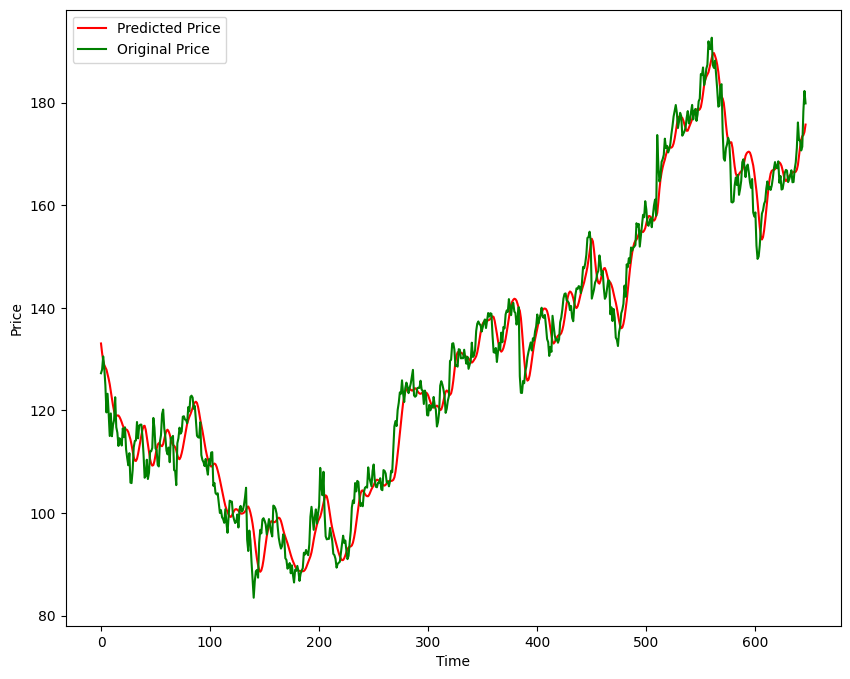

In [80]:
plt.figure(figsize=(10,8))
plt.plot(y_test_predict, 'r', label = 'Predicted Price')
plt.plot(y_test, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [81]:
data_train_scale = scaler.fit_transform(data_train)
x_train = []
y_train = []

for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(2488, 100, 1)

In [82]:
y_train_predict = model.predict(x_train)

78/78 [==============================] - 3s 44ms/step


In [83]:
y_train_predict = scaler.inverse_transform(y_train_predict) 
y_train = np.array(y_train).reshape(-1, 1)
y_train = scaler.inverse_transform(y_train)
print(y_train_predict.size)

2488


In [84]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE as an "accuracy metric"
mape = mean_absolute_percentage_error(y_train,y_train_predict)
accuracy = 100 - mape 
print(f'Model Accuracy: {accuracy}%')

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(y_train,y_train_predict))
print(f'mean_squared_error: {mse}')

Model Accuracy: 99.97943016005557%
mean_squared_error: 1.675224776237894


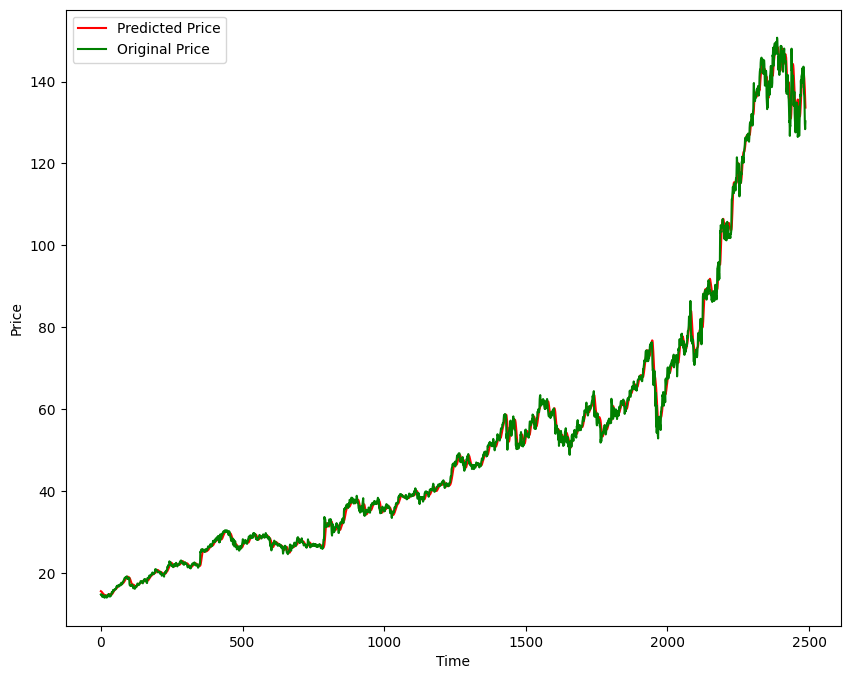

In [85]:
plt.figure(figsize=(10,8))
plt.plot(y_train_predict, 'r', label = 'Predicted Price')
plt.plot(y_train, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [86]:
model.save('Stock Prediction.keras')

In [87]:
df1 = pd.DataFrame(y_train_predict, columns=["Prediction"])
df2 = pd.DataFrame(y_test_predict, columns=["Prediction"])

# Create a DataFrame with NaN values and align columns with df1 and df2
df = pd.DataFrame({'Prediction': [np.nan] * 100})

# Concatenate train and test predictions along rows
df12 = pd.concat([df1, df2], ignore_index=True)

# Concatenate NaN column DataFrame with the predictions DataFrame
df_final = pd.concat([df, df12], ignore_index=True)

C:\Users\sajal dhuriya\AppData\Local\Temp\ipykernel_26988\3754152684.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [88]:
data = data.reset_index(drop=True)
df_final = df_final.reset_index(drop=True)
combined_df = pd.concat([data, df_final], axis=1)

In [89]:
combined_df

,Date,Adj Close,Close,High,Low,Open,Volume,MA50,MA200,Prediction
0,2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217,16.573130,16.573130,NaN
1,2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399,16.608871,16.608871,NaN
2,2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205,16.543823,16.543823,NaN
3,2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746,16.455321,16.455321,NaN
4,2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981,16.264935,16.264935,NaN
...,...,...,...,...,...,...,...,...,...,...
3230,2024-11-04 00:00:00+00:00,170.679993,170.679993,171.919998,169.485001,171.240005,16194000,163.924200,163.427300,172.768417
3231,2024-11-05 00:00:00+00:00,171.410004,171.410004,172.097000,170.369995,170.830002,12518300,163.993800,163.545800,173.474686
3232,2024-11-06 00:00:00+00:00,178.330002,178.330002,178.639999,175.039993,175.350006,27061500,164.232800,163.694050,173.655334
3233,2024-11-07 00:00:00+00:00,182.279999,182.279999,182.580002,178.889999,179.110001,16730400,164.588400,163.853700,174.288666


In [90]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE as an "accuracy metric"
mape = mean_absolute_percentage_error(combined_df.Close[101:],combined_df.Prediction[101:])
accuracy = 100 - mape 
print(f'Model Accuracy: {accuracy}%')

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse = math.sqrt(mean_squared_error(combined_df.Close[101:],combined_df.Prediction[101:]))
print(f'mean_squared_error: {mse}')

Model Accuracy: 99.97823277122859%
mean_squared_error: 2.4117855088626


In [91]:
import plotly.graph_objects as go


fig = go.Figure()

# Add actual close prices trace (red)
fig.add_trace(go.Scatter(
    x=combined_df['Date'],   
    y=combined_df['Close'],
    mode='lines',
    name='Actual Close Price',
    line=dict(color='red'),
))

# Add predicted prices trace (green)
fig.add_trace(go.Scatter(
    x=combined_df['Date'],  
    y=combined_df['Prediction'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='green'),
))

# Update layout settings
fig.update_layout(
    title='Stock Price Prediction',
    xaxis_title='Date',
    yaxis_title='Price ($/share)',
    xaxis_rangeslider_visible=True,    
)

# Show the plot
fig.show()


In [92]:

last_100_days = data[-100:]  
last_100_days_scaled = scaler.transform(last_100_days[['Close']])  


predictions = []


current_input = last_100_days_scaled.reshape((1, 100, 1))  # Reshape to (1, 100, 1)

for _ in range(100):  # Predict for the next 100 days
    
    next_prediction = model.predict(current_input)
    
    
    predictions.append(next_prediction[0, 0])  
    

    current_input = np.append(current_input[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))  # Reshape for inverse transform


last_date = data['Date'].iloc[-1]  
predicted_dates = pd.date_range(start=last_date, periods=101, freq='B')[1:]  

predicted_df = pd.DataFrame(data=predictions, index=predicted_dates, columns=['Predicted Price'])

predicted_df


1/1 [==============================] - 0s 25ms/step


,Predicted Price
2024-11-11 00:00:00+00:00,172.662094
2024-11-12 00:00:00+00:00,172.912674
2024-11-13 00:00:00+00:00,172.301682
2024-11-14 00:00:00+00:00,171.185501
2024-11-15 00:00:00+00:00,169.826035
...,...
2025-03-24 00:00:00+00:00,149.091385
2025-03-25 00:00:00+00:00,149.039017
2025-03-26 00:00:00+00:00,148.987625
2025-03-27 00:00:00+00:00,148.937119


In [93]:
import pandas as pd
import plotly.graph_objects as go

historical_prices = data[['Date', 'Close']].copy()
historical_prices.set_index('Date', inplace=True)

# Combine the historical prices with the predictions
predicted_prices_df = pd.DataFrame(predictions, index=predicted_dates, columns=['Predicted Price'])

# Create a figure with Plotly
fig = go.Figure()

# Add historical close prices trace
fig.add_trace(go.Scatter(
    x=historical_prices.index,
    y=historical_prices['Close'],
    mode='lines',
    name='Historical Close Price',
    line=dict(color='green'),
))

# Add predicted prices trace
fig.add_trace(go.Scatter(
    x=predicted_prices_df.index,
    y=predicted_prices_df['Predicted Price'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='red'),
))

# Update layout settings
fig.update_layout(
    title='Stock Price Prediction',
    xaxis_title='Date',
    yaxis_title='Price ($/share)',
    xaxis_rangeslider_visible=True,
)

# Show the plot
fig.show()


In [94]:
predicted_df.to_csv('predicted_stock_prices.csv')
